In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/Omdena-Srilanka/')
dir_name = 'Data'
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [3]:
!python download_abide_preproc.py -d reho -p cpac -s nofilt_noglobal -o './Data' -gt 2 -x M -lt 30 -t Caltech

Using upper age threshold of 30.000000...
Using lower age threshold of 2.000000...
b',Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ADI_RRB_TOTAL_C,ADI_R_ONSET_TOTAL_D,ADI_R_RSRCH_RELIABLE,ADOS_MODULE,ADOS_TOTAL,ADOS_COMM,ADOS_SOCIAL,ADOS_STEREO_BEHAV,ADOS_RSRCH_RELIABLE,ADOS_GOTHAM_SOCAFFECT,ADOS_GOTHAM_RRB,ADOS_GOTHAM_TOTAL,ADOS_GOTHAM_SEVERITY,SRS_VERSION,SRS_RAW_TOTAL,SRS_AWARENESS,SRS_COGNITION,SRS_COMMUNICATION,SRS_MOTIVATION,SRS_MANNERISMS,SCQ_TOTAL,AQ_TOTAL,COMORBIDITY,CURRENT_MED_STATUS,MEDICATION_NAME,OFF_STIMULANTS_AT_SCAN,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_WRITTEN_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DOMESTIC_V_SCALED,VINELAND_COMMUNITY_V_SCALED,VINELAND_DAILYLVNG_STANDARD,VINELAND_INTERPERSONAL_V_SCALED,VINELAND_PLAY_V_SCALED,VINELAND_COP

In [4]:
import nibabel as nib


In [5]:
# Check for bad data (which I guess there will be none) by checking volume dimensions of all images
images_path = r'./Data/Outputs/cpac/nofilt_noglobal/reho/'

def show_volume_dimensions(directory):
    print("Directory: " + directory)
    # Get directory object
    directory_object = os.fsencode(directory)
    # For each file in directory
    for file in os.listdir(directory_object):
        # Get filename
        filename = os.fsdecode(file)
        # Load nifti file volume
        volume = nib.load(directory + filename)
        # Print filename and volume dimensions
        print(filename)
        print(volume.shape)

# Print dimensions of all image volumes
show_volume_dimensions(images_path)

Directory: ./Data/Outputs/cpac/nofilt_noglobal/reho/
Caltech_0051457_reho.nii.gz
(61, 73, 61)
Caltech_0051459_reho.nii.gz
(61, 73, 61)
Caltech_0051464_reho.nii.gz
(61, 73, 61)
Caltech_0051465_reho.nii.gz
(61, 73, 61)
Caltech_0051466_reho.nii.gz
(61, 73, 61)
Caltech_0051467_reho.nii.gz
(61, 73, 61)
Caltech_0051468_reho.nii.gz
(61, 73, 61)
Caltech_0051470_reho.nii.gz
(61, 73, 61)
Caltech_0051472_reho.nii.gz
(61, 73, 61)
Caltech_0051473_reho.nii.gz
(61, 73, 61)
Caltech_0051474_reho.nii.gz
(61, 73, 61)
Caltech_0051478_reho.nii.gz
(61, 73, 61)
Caltech_0051481_reho.nii.gz
(61, 73, 61)
Caltech_0051483_reho.nii.gz
(61, 73, 61)
Caltech_0051484_reho.nii.gz
(61, 73, 61)
Caltech_0051485_reho.nii.gz
(61, 73, 61)
Caltech_0051486_reho.nii.gz
(61, 73, 61)
Caltech_0051487_reho.nii.gz
(61, 73, 61)
Caltech_0051488_reho.nii.gz
(61, 73, 61)
Caltech_0051492_reho.nii.gz
(61, 73, 61)


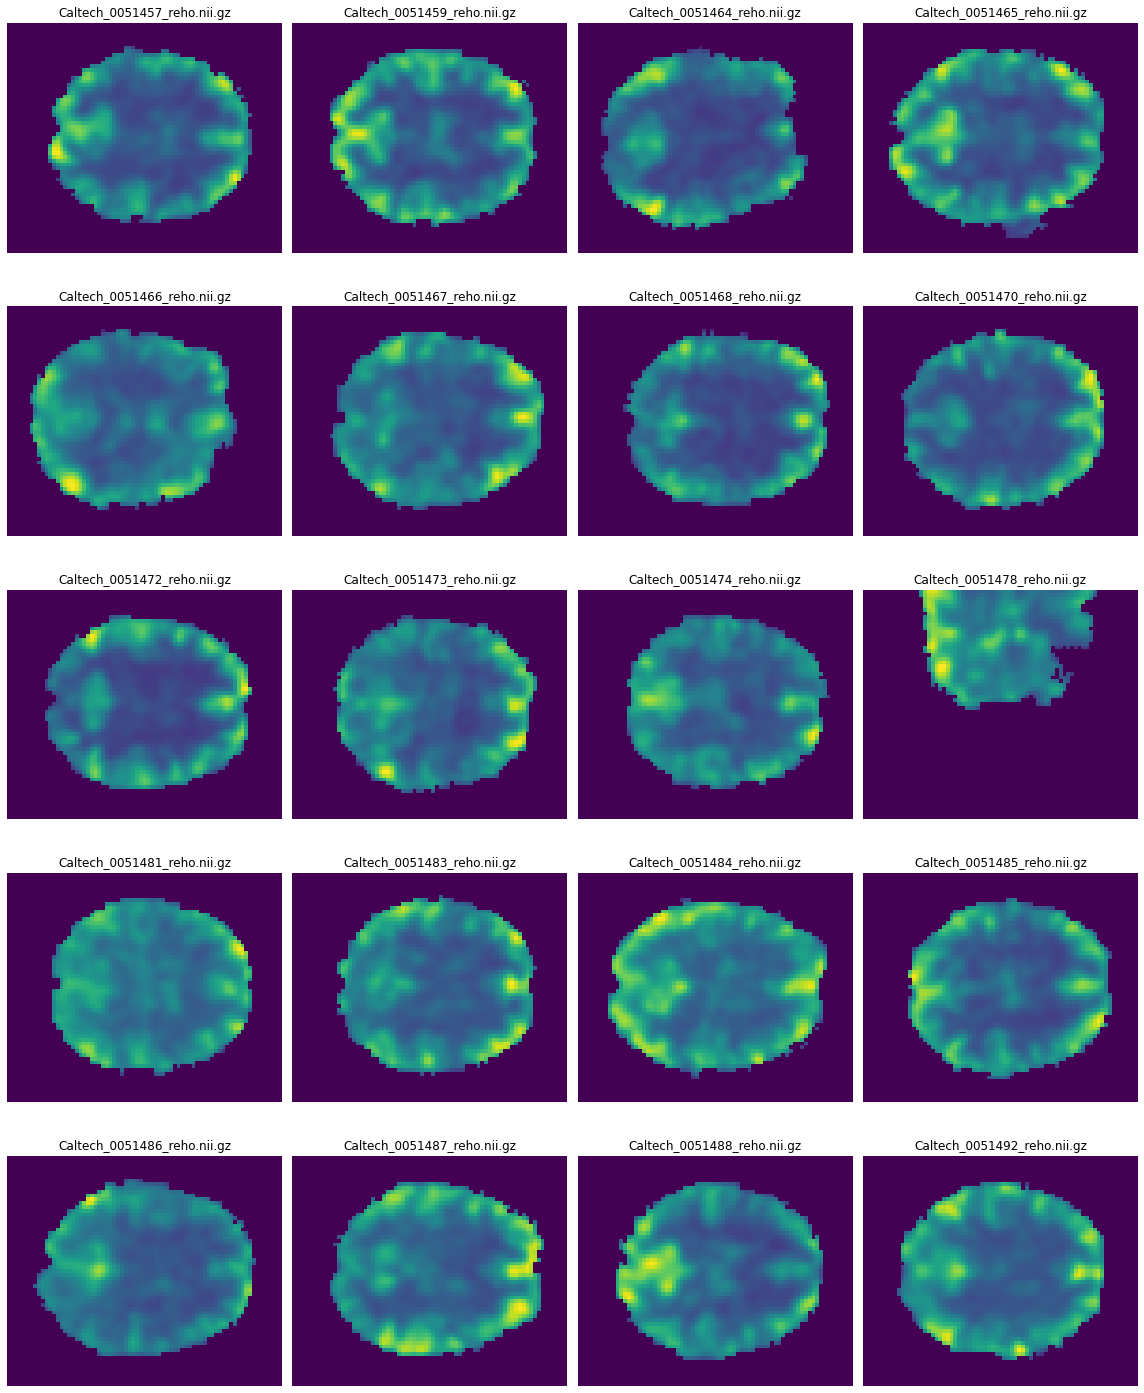

In [6]:
import matplotlib.pyplot as plt

def show_nifti_files(directory):
    # Get directory object
    directory_object = os.fsencode(directory)
    # Get list of filenames in directory
    filenames = [os.fsdecode(file) for file in os.listdir(directory_object)]
    # Determine number of rows and columns for subplots
    n_files = len(filenames)
    n_cols = 4
    n_rows = (n_files + n_cols - 1) // n_cols
    # Create figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
    axes = axes.ravel()
    # For each file in directory
    for i, filename in enumerate(filenames):
        # Load nifti file volume
        volume = nib.load(directory + filename)
        # Display volume
        axes[i].imshow(volume.get_fdata()[:, :, volume.shape[-1]//2])
        axes[i].set_title(filename)
        axes[i].axis('off')
    # Remove unused subplots
    for i in range(n_files, n_rows*n_cols):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

show_nifti_files("./Data/Outputs/cpac/nofilt_noglobal/reho/")


In [7]:
!python download_abide_preproc.py -d reho -p cpac -s filt_noglobal -o './Data' -gt 2 -lt 30 -x M -t Caltech

Using upper age threshold of 30.000000...
Using lower age threshold of 2.000000...
b',Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ADI_RRB_TOTAL_C,ADI_R_ONSET_TOTAL_D,ADI_R_RSRCH_RELIABLE,ADOS_MODULE,ADOS_TOTAL,ADOS_COMM,ADOS_SOCIAL,ADOS_STEREO_BEHAV,ADOS_RSRCH_RELIABLE,ADOS_GOTHAM_SOCAFFECT,ADOS_GOTHAM_RRB,ADOS_GOTHAM_TOTAL,ADOS_GOTHAM_SEVERITY,SRS_VERSION,SRS_RAW_TOTAL,SRS_AWARENESS,SRS_COGNITION,SRS_COMMUNICATION,SRS_MOTIVATION,SRS_MANNERISMS,SCQ_TOTAL,AQ_TOTAL,COMORBIDITY,CURRENT_MED_STATUS,MEDICATION_NAME,OFF_STIMULANTS_AT_SCAN,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_WRITTEN_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DOMESTIC_V_SCALED,VINELAND_COMMUNITY_V_SCALED,VINELAND_DAILYLVNG_STANDARD,VINELAND_INTERPERSONAL_V_SCALED,VINELAND_PLAY_V_SCALED,VINELAND_COP

In [8]:
# Check for outliers/bad data by checking volume dimensions of all images
images_path = r'./Data/Outputs/cpac/filt_noglobal/reho/'

def show_volume_dimensions(directory):
    print("Directory: " + directory)
    # Get directory object
    directory_object = os.fsencode(directory)
    # For each file in directory
    for file in os.listdir(directory_object):
        # Get filename
        filename = os.fsdecode(file)
        # Load nifti file volume
        volume = nib.load(directory + filename)
        # Print filename and volume dimensions
        print(filename)
        print(volume.shape)

# Print dimensions of all image volumes
show_volume_dimensions(images_path)

Directory: ./Data/Outputs/cpac/filt_noglobal/reho/
Caltech_0051457_reho.nii.gz
(61, 73, 61)
Caltech_0051459_reho.nii.gz
(61, 73, 61)
Caltech_0051464_reho.nii.gz
(61, 73, 61)
Caltech_0051465_reho.nii.gz
(61, 73, 61)
Caltech_0051466_reho.nii.gz
(61, 73, 61)
Caltech_0051467_reho.nii.gz
(61, 73, 61)
Caltech_0051468_reho.nii.gz
(61, 73, 61)
Caltech_0051470_reho.nii.gz
(61, 73, 61)
Caltech_0051472_reho.nii.gz
(61, 73, 61)
Caltech_0051473_reho.nii.gz
(61, 73, 61)
Caltech_0051474_reho.nii.gz
(61, 73, 61)
Caltech_0051478_reho.nii.gz
(61, 73, 61)
Caltech_0051481_reho.nii.gz
(61, 73, 61)
Caltech_0051483_reho.nii.gz
(61, 73, 61)
Caltech_0051484_reho.nii.gz
(61, 73, 61)
Caltech_0051485_reho.nii.gz
(61, 73, 61)
Caltech_0051486_reho.nii.gz
(61, 73, 61)
Caltech_0051487_reho.nii.gz
(61, 73, 61)
Caltech_0051488_reho.nii.gz
(61, 73, 61)
Caltech_0051492_reho.nii.gz
(61, 73, 61)


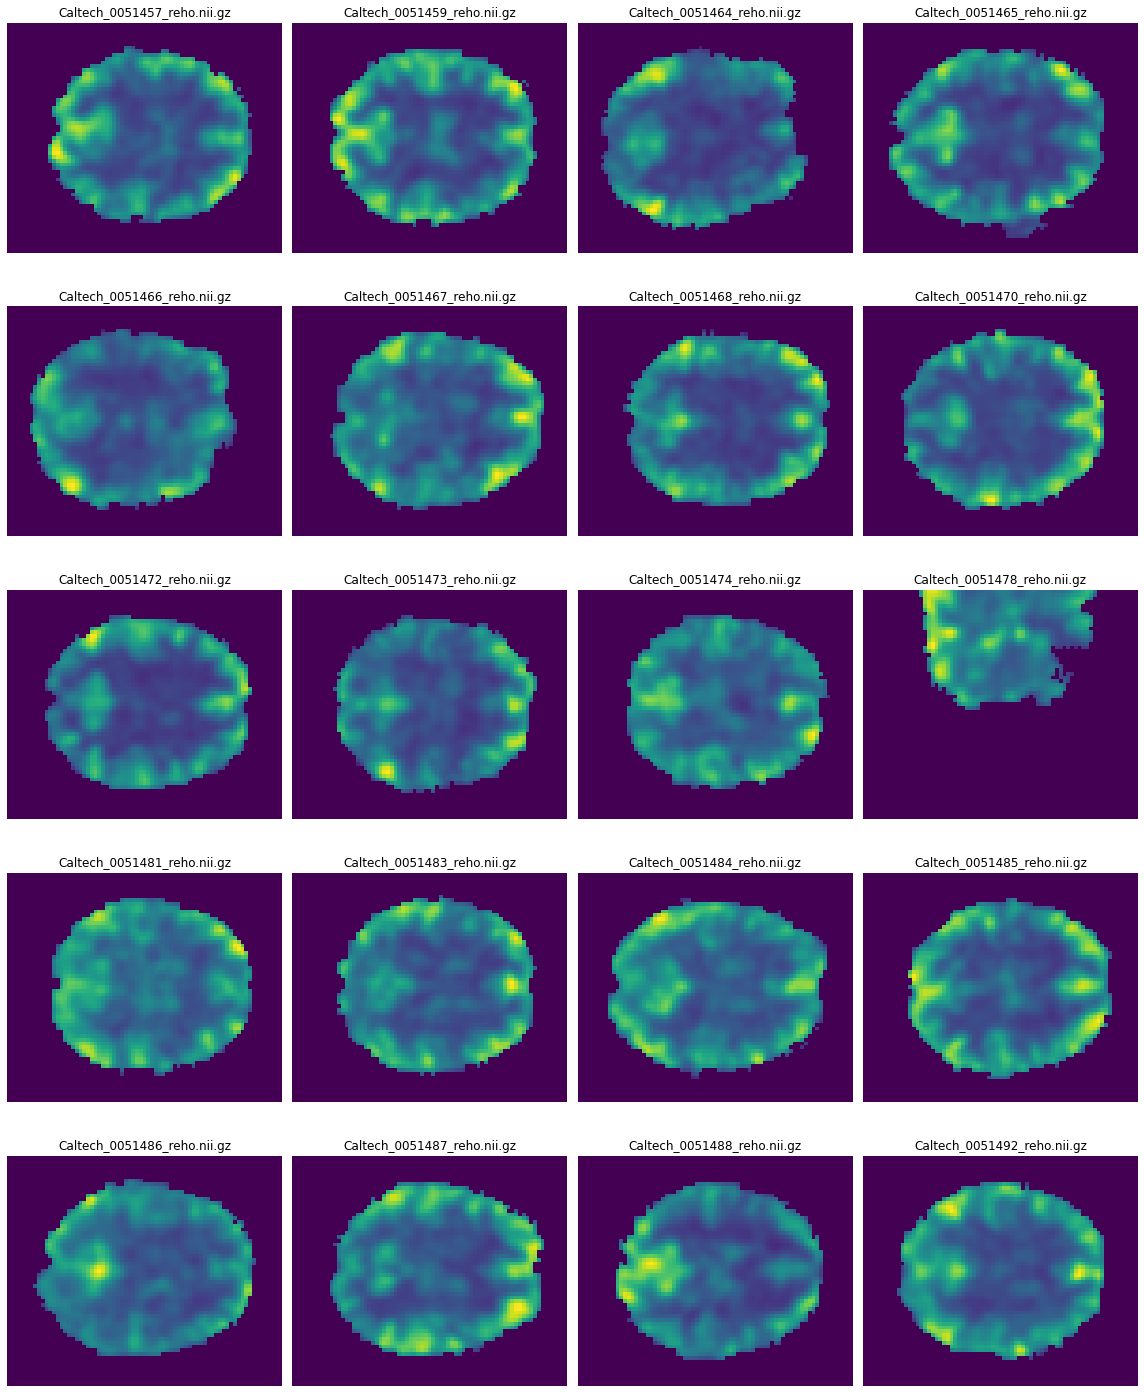

In [9]:
import matplotlib.pyplot as plt

def show_nifti_files(directory):
    # Get directory object
    directory_object = os.fsencode(directory)
    # Get list of filenames in directory
    filenames = [os.fsdecode(file) for file in os.listdir(directory_object)]
    # Determine number of rows and columns for subplots
    n_files = len(filenames)
    n_cols = 4
    n_rows = (n_files + n_cols - 1) // n_cols
    # Create figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
    axes = axes.ravel()
    # For each file in directory
    for i, filename in enumerate(filenames):
        # Load nifti file volume
        volume = nib.load(directory + filename)
        # Display volume
        axes[i].imshow(volume.get_fdata()[:, :, volume.shape[-1]//2])
        axes[i].set_title(filename)
        axes[i].axis('off')
    # Remove unused subplots
    for i in range(n_files, n_rows*n_cols):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

show_nifti_files("./Data/Outputs/cpac/filt_noglobal/reho/")
